In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('prosperLoanData.csv')

# Simplify the dataframe to only include relevant columns for this analysis
df2 = df[['ListingKey', 'ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'LenderYield', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'IncomeRange', 'MonthlyLoanPayment']]

# high-level overview of data shape and composition
print(df2.shape)
print(df2.info())

(113937, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
ListingKey               113937 non-null object
ListingCreationDate      113937 non-null object
Term                     113937 non-null int64
LoanStatus               113937 non-null object
BorrowerAPR              113912 non-null float64
LenderYield              113937 non-null float64
EmploymentStatus         111682 non-null object
IsBorrowerHomeowner      113937 non-null bool
CreditScoreRangeLower    113346 non-null float64
IncomeRange              113937 non-null object
MonthlyLoanPayment       113937 non-null float64
dtypes: bool(1), float64(4), int64(1), object(5)
memory usage: 8.8+ MB
None


In [3]:
df2.head()

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,LenderYield,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,IncomeRange,MonthlyLoanPayment
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1380,Self-employed,True,640.0,"$25,000-49,999",330.43
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0820,Employed,False,680.0,"$50,000-74,999",318.93
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2400,Not available,False,480.0,Not displayed,123.32
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0874,Employed,True,800.0,"$25,000-49,999",321.45
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.1985,Employed,True,680.0,"$100,000+",563.97


In [4]:
# convert Credit Score into ordered categorical values

# Bin edges 
bin_edges = [0, 1, 579, 669, 739, 799, 900] 

# Labels for our credit scores
bin_names = ['None', 'Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']

# Creates CreditScore column
df2['CreditScore'] = pd.cut(df2['CreditScoreRangeLower'], bin_edges, labels=bin_names)

# Let's take a randon sample to see if our categories work
df2.sample(5)

C:\Users\nasty\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,LenderYield,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,IncomeRange,MonthlyLoanPayment,CreditScore
112293,D167356230914864560A6BA,2012-11-05 14:38:02.643000000,36,Current,0.20462,0.1579,Employed,True,680.0,"$100,000+",213.29,Good
100247,7567351089470403446D624,2011-03-22 16:00:31.593000000,36,Completed,0.35643,0.3099,Employed,True,680.0,"$25,000-49,999",174.20,Good
40810,31823578871937883634794,2013-05-06 14:10:45.057000000,36,Current,0.18214,0.1359,Employed,True,700.0,"$50,000-74,999",516.97,Good
88670,D80436052614502212F6194,2014-03-07 14:12:57.193000000,36,Current,0.22966,0.1820,Employed,False,700.0,"$50,000-74,999",551.36,Good
18071,8B973545889247437DB9A59,2012-04-26 07:27:51.550000000,36,Current,0.33553,0.2858,Employed,False,640.0,"$50,000-74,999",168.89,Fair


In [5]:
df2.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [6]:
print(df2.Term.unique())
print(df2.IncomeRange.unique())
print(df2.CreditScore.unique())

[36 60 12]
['$25,000-49,999' '$50,000-74,999' 'Not displayed' '$100,000+'
 '$75,000-99,999' '$1-24,999' 'Not employed' '$0']
[Fair, Good, Very Poor, Exceptional, Very Good, NaN]
Categories (5, object): [Very Poor < Fair < Good < Very Good < Exceptional]


In [7]:
# convert Term, IncomeRange, CreditScoreRangeLower, into ordered categorical types
ordinal_var_dict = {'Term': [12, 36, 60],
                    'IncomeRange': ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                    '$75,000-99,999', '$100,000+'],
                    'CreditScore': ['NaN', 'Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df2[var] = df2[var].astype(ordered_var)

C:\Users\nasty\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


### Test

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
ListingKey               113937 non-null object
ListingCreationDate      113937 non-null object
Term                     113937 non-null category
LoanStatus               113937 non-null object
BorrowerAPR              113912 non-null float64
LenderYield              113937 non-null float64
EmploymentStatus         111682 non-null object
IsBorrowerHomeowner      113937 non-null bool
CreditScoreRangeLower    113346 non-null float64
IncomeRange              113937 non-null category
MonthlyLoanPayment       113937 non-null float64
CreditScore              113213 non-null category
dtypes: bool(1), category(3), float64(4), object(4)
memory usage: 7.4+ MB


## Univariate Data Analysis

### Quantitative Variables

#### Borrower APR

Text(0.5, 0, 'Borrower APR')

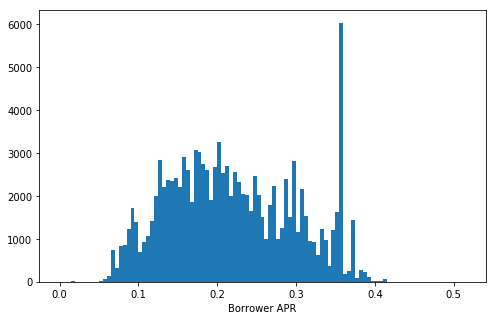

In [9]:
binsize = 0.005
bins = np.arange(0, df2.BorrowerAPR.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR')

#### LenderYield

Text(0.5, 0, 'Lender Yield')

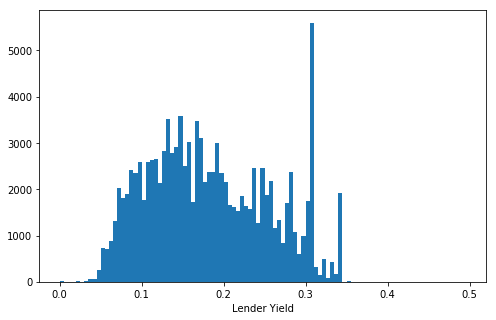

In [10]:
binsize = 0.005
bins = np.arange(0, df2.LenderYield.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'LenderYield', bins = bins);
plt.xlabel('Lender Yield')

#### Monthly Loan Payment

Text(0.5, 0, 'Monthly Loan Payment')

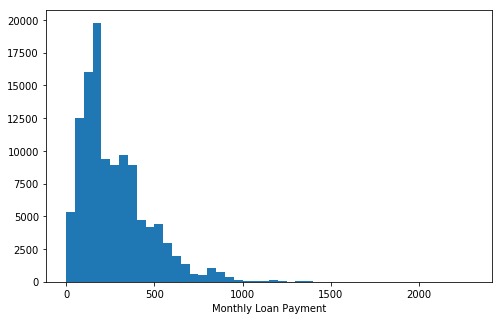

In [11]:
binsize = 50
bins = np.arange(0, df2.MonthlyLoanPayment.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'MonthlyLoanPayment', bins = bins);
plt.xlabel('Monthly Loan Payment')


### Ordinal Variables 

#### Term, Income Range and Credit Score

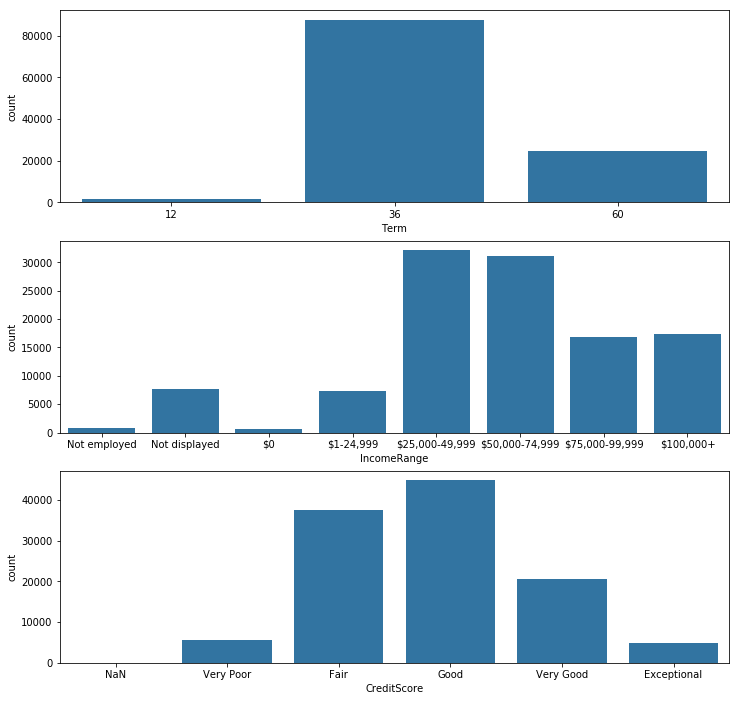

In [12]:
# let's plot all three ordinary variables together to get an idea of each distribution.

fig, ax = plt.subplots(nrows=3, figsize = [12,12])

default_color = sb.color_palette()[0]
sb.countplot(data = df2, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = df2, x = 'IncomeRange', color = default_color, ax = ax[1])
sb.countplot(data = df2, x = 'CreditScore', color = default_color, ax = ax[2])

plt.show()

### Categorical Variables 

### Loan Status, Employment Status, Is Borrower Homeowner	

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

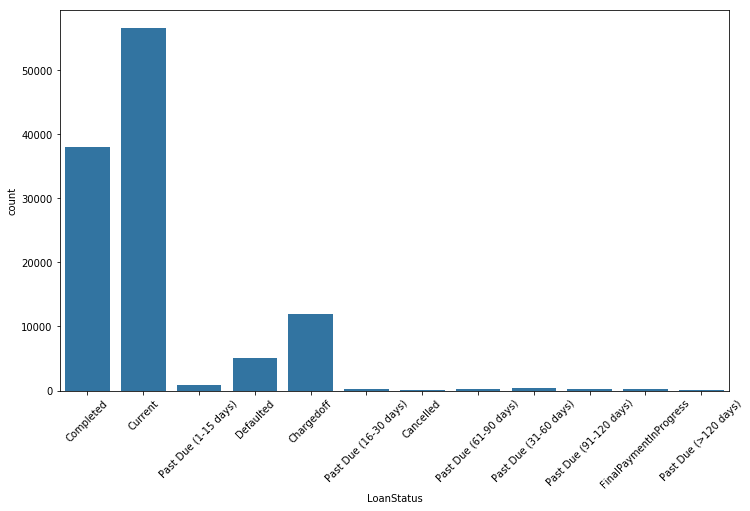

In [15]:
default_color = sb.color_palette()[0]

plt.figure(figsize = [12,7])
sb.countplot(data = df2, x = 'LoanStatus', color = default_color)
plt.xticks(rotation= 45)

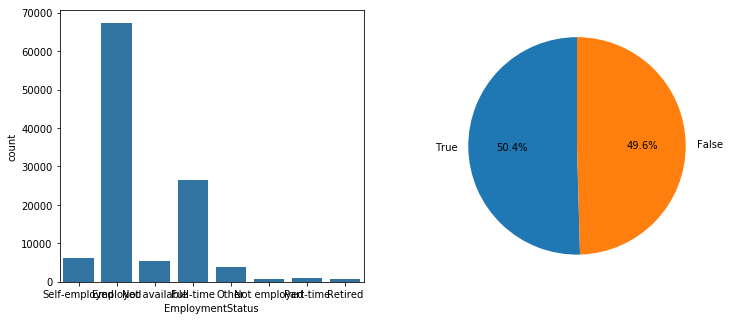

In [37]:
fig, ax = plt.subplots(ncols=2, figsize = [12,5])

default_color = sb.color_palette()[0]
sb.countplot(data = df2, x = 'EmploymentStatus', color = default_color, ax = ax[0])
plt.pie(df2.IsBorrowerHomeowner.value_counts().values, labels = df2.IsBorrowerHomeowner.value_counts().index,
        startangle = 90, autopct='%0.01f%%');

plt.show()

##  